In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing tweety api for X(twitter)
from tweety import Twitter

In [3]:
# initializing/logging in
app = Twitter('session')
app.sign_in('username', 'password')

User(id=1018223930241413120, username=Amonkiprono79, name=Axc, verified=False)

In [4]:
# search for 'XAUUSD'(gold) tweets in five first pages
tweets = app.search('XAUUSD', pages=5)

# creating a list to store the results from the search
text = []
for tweet in tweets:
    # selecting only english tweets
    if tweet.language == 'en':
        text.append(tweet.text)
# reading the first five tweets in the list    
text[:5]

['Currently, gold is in a consolidation phase, trapped below the key resistance level of $2525, and the price range has not yet been broken.\n\nRelying on the 257 resistance level to continue to go high is our strategy for next week\n\n#XAUUSD---#gold---#FX https://t.co/W9jdCqFCxx',
 'Take that risk🥶💙\n\n$XAUUSD $GOLD $JiGi https://t.co/Nw2BVyYudd',
 '#XAUUSD \n\nIt all started with a dream \nNow it turning to reality. \n\nNew month again \n\nTell me why I should give you $100 ( #160,000 ) \n\nTesting my #SYNTHETIC skills. https://t.co/0eIBvwG0RK',
 'XAUUSD NFP 🇺🇸 \n\nConsistency is key to mastery.\nEven when you’re not in the mood, keep showing up…\n\nGod Fir$t 🕯️😮\u200d💨 https://t.co/QFPpDTGcfF',
 "$XAUUSD\n\nRisk some dollars with me.\n\nTP or SL. One will happen...\n\nI'm in already. Let's go 🔥 https://t.co/110R3EvlgQ"]

In [5]:
# conveting the list to a pandas dataframe
gold_df = pd.DataFrame(text)
gold_df.columns = ['tweets']
gold_df.head()

,tweets
0,"Currently, gold is in a consolidation phase, t..."
1,Take that risk🥶💙\n\n$XAUUSD $GOLD $JiGi https:...
2,#XAUUSD \n\nIt all started with a dream \nNow ...
3,XAUUSD NFP 🇺🇸 \n\nConsistency is key to master...
4,$XAUUSD\n\nRisk some dollars with me.\n\nTP or...


In [6]:
# importing vader to get the sentiment on the price of gold to US dollar(XAUUSD)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import swifter

# initializing
vader = SentimentIntensityAnalyzer()

# get sentiment function
def get_sentiment(text):
    return vader.polarity_scores(text.lower())['compound']

# applying the function to the dataframe
gold_df['sentiment_score'] = gold_df['tweets'].swifter.apply(get_sentiment)

# checking the sentiment score of the first 10 tweets
gold_df.head(10)

Pandas Apply:   0%|          | 0/51 [00:00<?, ?it/s]

,tweets,sentiment_score
0,"Currently, gold is in a consolidation phase, t...",-0.2134
1,Take that risk🥶💙\n\n$XAUUSD $GOLD $JiGi https:...,0.4767
2,#XAUUSD \n\nIt all started with a dream \nNow ...,0.2500
3,XAUUSD NFP 🇺🇸 \n\nConsistency is key to master...,0.2732
4,$XAUUSD\n\nRisk some dollars with me.\n\nTP or...,-0.5423
5,Been forward testing my strategy on #XAUUSD an...,0.5445
6,XAUUSD has ruined more lives than any other cu...,-0.8391
7,$XAUUSD\n\nI faded the SELL.\nThe BUY faded me...,0.7935
8,#Gold / #XauUsd Wednesday longs running risk f...,0.2960
9,Engineered Liquidity is Goated\n\nYesterday I ...,0.5106


In [10]:
# getting the average sentiment score of gold to US dollar
gold_df['sentiment_score'].mean()

0.16826

'''
### The sentiment score lies in the range of -1 to 1 with -1 being a negative sentiment in this case meaning price falling(bearish) while 1 being positive(bullish) and 0 being neutral. Therefore an average of 0.17 means somewhat a neutral sentiment.
'''

In [11]:
# getting what is trending
trends = app.get_trends()
for trend in trends[:10]:
    print(trend.name)

Roman Abramovich
Chelsea Football Club
Todd Boehly
Thomas Tuchel
Pritty Vishy
Amerix
Morara Kebaso
Crazy Kennar
Wayne Rooney
Mourinho


In [58]:
# getting the first five page timeline tweets
tls = app.get_home_timeline(pages=5)

# list to store the tweets
txt = []
for tl in tls:
    txt.append(tl.text)

# first five tweets
txt[:5]

['Kuna beste yangu anauliza anaweza pata wapi kama hii exactly',
 'Oh my goodness. 3.9M for this long corridor? Developers kindly check yourselves! https://t.co/isfe1vxPj3',
 'Ending it all by 6PM today.\n\nThis life no worth living.💔',
 "Huwezi niambia ati systems zinawork when\n\n1. NHIF LOST 368 MILLION DUE TO TYPOS\n\n2. NTSA CANT ACCOUNT FOR 1.2B\n\n3. E CITIZEN CAN'T ACCOUNT FOR 15.5B\n\n4. PUBLIC UNIVERSITIES CAN'T ACCOUNT FOR 12B\n\n5. NYS CANT ACCOUNT FOR 1.2B\n\n6. PARLIAMENT HAD SWITCHES ZA 6M IDLNG\n\n#RutoMustGo",
 "There's so much disrespect for the peasant swamp rats coming from these politicians kids. https://t.co/h4HabjeEpW"]

In [61]:
# converting the timeline tweets to a dataframe
tl_df = pd.DataFrame(txt, columns=['tweets'])
tl_df.head()

,tweets
0,Kuna beste yangu anauliza anaweza pata wapi ka...
1,Oh my goodness. 3.9M for this long corridor? D...
2,Ending it all by 6PM today.\n\nThis life no wo...
3,Huwezi niambia ati systems zinawork when\n\n1....
4,There's so much disrespect for the peasant swa...


In [27]:
# importing spacy for nlp processing i.e. lemmatizing text
import spacy

# loading the spacy model
spacy_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# function to lemmatize text
def lemma_text(text):
    for tx in text:    
        processed_text = spacy_model(tx)
        lemmas = [w.lemma_ if w.lemma_ != '-PRON-' else w.lower_ for w in processed_text if w.is_alpha and not w.is_stop]
        
        return ' '.join(lemmas).lower()


Pandas Apply:   0%|          | 0/169 [00:00<?, ?it/s]

,tweets
0,k
1,t
2,n
3,h
4,


In [62]:
# converting the dataframe to string list
tl_txt = tl_df.to_string(index=False)
print(tl_txt)

In [63]:
# importing nlp libraries
import re
import nltk
import textract
import string

# set of english stopper words
en_stopwords = set(nltk.corpus.stopwords.words('english'))

# function to clean text i.e. remove spaces, punctuation, lowercase e.t.c
def clean_text(text):
    translator = str.maketrans('', '', string.punctuation + string.digits)
    text = text.translate(translator)
    words = text.lower().split()
    words = [w for w in words if w not in en_stopwords and len(w) > 3]
    return words

# apply the clean_text function to the timeline tweets
text = clean_text(tl_txt)
# print first five words
text[:5]

['tweets', 'kuna', 'beste', 'yangu', 'anauliza']

In [64]:
# find bigrams in the tweets i.e. words that appear as pairs
bigrams = list([' '.join(bg) for bg in nltk.bigrams(text)])
bigrams[:3]

['tweets kuna', 'kuna beste', 'beste yangu']

In [65]:
# finding the frequency distribution of single words and bigrams in the tweets
ug_fdist = nltk.FreqDist(text)
bg_fdist = nltk.FreqDist(bigrams)

# print the top 10 common words and bigrams
print(ug_fdist.most_common(10))
print(bg_fdist.most_common(10))

[('cant', 20), ('account', 20), ('million', 11), ('chelsea', 11), ('worth', 8), ('people', 8), ('systems', 7), ('huwezi', 6), ('lost', 6), ('citizen', 6)]
[('cant account', 20), ('huwezi niambia', 5), ('niambia systems', 5), ('systems zinawork', 5), ('zinawork whennn', 5), ('whennn nhif', 5), ('nhif lost', 5), ('lost million', 5), ('million typosnn', 5), ('typosnn ntsa', 5)]


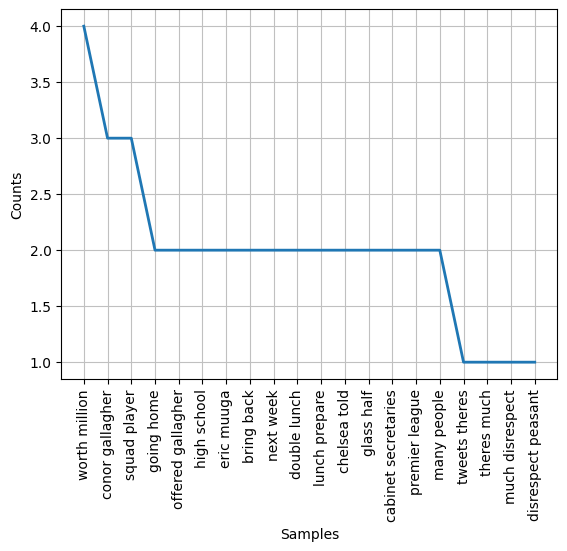

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
# line plot of the top 20 bigrams
bg_fdist.plot(20)

'''
### from the plot above, 'worth million' and 'conor gallagher' are the most frequent bigrams which are related to football player transfer
'''

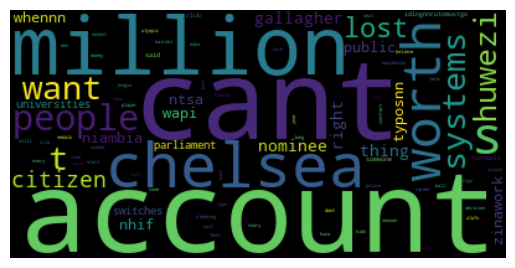

In [66]:
# import wordcloud for generating word cloud
from wordcloud import WordCloud

# plotting the word cloud
wordcloud = WordCloud(collocations=False).generate(' '.join(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#plt.savefig(r"C:\Users\HP 820 G3\Downloads\wordcloud_2.jpg", dpi=1200)

In [10]:
# creating a list of politicians
politicians = ['ruto', 'raila', 'duale', 'morara', 'murkomen']

# creating a dictionary to store tweets about the politician
pol_text = {}
for key in politicians:
    pol_text[key] = []

# looping through the list to search tweets about the politician
for pol in politicians:
    politic_tweets = app.search(pol, pages=2)
    for twt in politic_tweets:
        pol_text[pol].append(twt.text)

pol_text

{'ruto': ['Heartbreaking 💔💔💔William Ruto has been found alive this morning at the age of 57. https://t.co/F1btzB7t8R',
  'Mtu yeyote anacheza na future yako should be your greatest enemy. It is for the same reason I hate Zakayo with all my heart.',
  'Don’t retweet this. It will annoy Ruto and his minions. Please don’t retweet 🙏 https://t.co/6300vLxst5',
  'When he moved back and smoked the cigarette like a G I thought he was about to lecture Ruto. Kumbe he is a man of few words.\n\nhttps://t.co/kuXMdtBxCf',
  "Ruto won't believe. https://t.co/VqRbJ2cxNa",
  "Behind every Ruto's shady deal, there's a corrupt greedy Mhindi billionaire. Housing, JKIA, Teachers useless Insurance, anything, you just name it😌.",
  "Weston Hotel built on grabbed land\nWeston Hotel won 3/4 of government tenders with Ruto as DP\nWeston Hotel recieves MCAs from as far as Kericho for boardroom meetings\n\nAnd now, it has won the most lucrative hospitality tenders under Ruto's regime. \n\nJust how much is enough?

In [11]:
# converting the dictionary to a dataframe
pol_df = pd.DataFrame(pol_text)
pol_df.head()

,ruto,raila,duale,morara,murkomen
0,Heartbreaking 💔💔💔William Ruto has been found a...,Why should African leaders go to China? - Rail...,Mogadishu has been brought near to Nairobi cou...,All I am asking Gen Z and Kenyans in general i...,Like for Crazy Kennar and Repost for Kipchumba...
1,Mtu yeyote anacheza na future yako should be y...,"Don't retweet this, I don't want Raila Odinga'...",Cabinet Secretary Hon. Aden Duale on Thursday ...,Nyamira Township UDA MCA aspirant Ben Mogaka ...,Kipchumba Murkomen is the CS who was arrested ...
2,Don’t retweet this. It will annoy Ruto and his...,We spent a great afternoon hosting the Sakwa A...,No comment. https://t.co/sRcp8EiFNR,This is Isiolo Level 5 Hospital Mortuary. It c...,Sports CS Kipchumba Murkomen gifts Gor Mahia K...
3,When he moved back and smoked the cigarette li...,The Luo Nyanza son. A doctor. A true product o...,Aden Duale hints at not supporting Raila Amoll...,What is the likelihood that these two people t...,Good eveningpal👋\n(Stretching material) short-...
4,Ruto won't believe. https://t.co/VqRbJ2cxNa,I'm happy with the official residence of incom...,Did the prophecy come through a little sooner...,Mimi I just want us to Support Morara in whate...,Fuck Ruto. Fuck Osama. Fuck traitors. Fuck pol...


In [12]:
# getting sentimet score of each politician
for pol in politicians:
    pol_df[pol+'_setiment_score'] = pol_df[pol].swifter.apply(get_sentiment)
pol_df.head()

Pandas Apply:   0%|          | 0/39 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39 [00:00<?, ?it/s]

,ruto,raila,duale,morara,murkomen,ruto_setiment_score,raila_setiment_score,duale_setiment_score,morara_setiment_score,murkomen_setiment_score
0,Heartbreaking 💔💔💔William Ruto has been found a...,Why should African leaders go to China? - Rail...,Mogadishu has been brought near to Nairobi cou...,All I am asking Gen Z and Kenyans in general i...,Like for Crazy Kennar and Repost for Kipchumba...,-0.0772,0.0000,-0.1779,0.5859,0.0258
1,Mtu yeyote anacheza na future yako should be y...,"Don't retweet this, I don't want Raila Odinga'...",Cabinet Secretary Hon. Aden Duale on Thursday ...,Nyamira Township UDA MCA aspirant Ben Mogaka ...,Kipchumba Murkomen is the CS who was arrested ...,0.2960,-0.0572,0.4019,0.7003,-0.1779
2,Don’t retweet this. It will annoy Ruto and his...,We spent a great afternoon hosting the Sakwa A...,No comment. https://t.co/sRcp8EiFNR,This is Isiolo Level 5 Hospital Mortuary. It c...,Sports CS Kipchumba Murkomen gifts Gor Mahia K...,-0.1531,0.8016,-0.2960,-0.5994,-0.4588
3,When he moved back and smoked the cigarette li...,The Luo Nyanza son. A doctor. A true product o...,Aden Duale hints at not supporting Raila Amoll...,What is the likelihood that these two people t...,Good eveningpal👋\n(Stretching material) short-...,0.3612,0.9678,0.3387,0.0000,0.8957
4,Ruto won't believe. https://t.co/VqRbJ2cxNa,I'm happy with the official residence of incom...,Did the prophecy come through a little sooner...,Mimi I just want us to Support Morara in whate...,Fuck Ruto. Fuck Osama. Fuck traitors. Fuck pol...,0.0000,0.7430,0.0000,0.4588,-0.9918


In [13]:
pol_df.loc[:,'ruto_setiment_score':].mean()

ruto_setiment_score       -0.217390
raila_setiment_score      -0.041613
duale_setiment_score       0.091731
morara_setiment_score      0.041631
murkomen_setiment_score    0.053823
dtype: float64

'''
### from the score above, duale has the highest sentiment score while ruto has the most negative
'''